# Problem Statement

Most people while travelling to a new city or country would like to explore the restaurants in an area and with little to no knowledge of the area, one might find it difficult to identify the good restaurants that suit their needs. Commonly, they will ask a friend that is familiar with or has lived in that city, what the best restaurant in town is and they might know good restaurants but they probably don’t match your personal needs and this is where a personalized recommendation system comes in.  


What this project aims to build is a restaurant recommendation system which is based on the reviews of **user reviews** and **sentiment analysis of the reviews** so as to recommend restaurants that the user might be interested in trying out.

The Recommendation System Models will be built based on the **Yelp Reviews Dataset** on Kaggle, particularly focusing on Restaurant Reviews in the city of `Toronto`. 




# Overview of Project

This notebook will contain codes and steps used to explore the datasets which were downloaded from Kaggle. You can find them [here](https://www.kaggle.com/yelp-dataset/yelp-dataset) 

The dataset contains seven files in original JSON files. In total there are:
- 5,200,000 user reviews
- information on 174, 000 businesses
- The data spans 11 metropolitan areas

For the purpose of this project, we use three of the files which are `yelp_academic_dataset_business.json`, `yelp_academic_dataset_reviews.json`,
`yelp_academic_dataset_user.json` 

We cleaned the dataset and saved them in csv format for easy exploration as well as modeling of the models. 


** NB: This notebook will crash if not used with RAM of 25GB and above.**

This project will apply **Natural Language Processing** on the Yelp Restaurant Reviews so as to create new insights and features that can be used for the various recommendation system models.


For **Sentiment Analysis** Packages such as `Textblob` and `VADER` were used to derive the users' overal sentiment of the reviews of a particular restaurant. We then combined the sentiment scores together with the rating score from reviews so as to build out an overal score that better reflects a user's overall experience and feeling towards a restaurant. 

This super score collected will help in bulding our **Collaborative filtering recommendation system**

We further incorporate **Topic Modeling (LDA)** to further classify text reviews based on several dominant topics. By identifying the key words in the different dominant topics, we go ahead to builf a **Content-based recommendation system**


Lastly, we will use the longitude and latitude points of restaurants to build a **Location Based Recommendation System** by clustering the restaurants together using the **K-Means Clustering Algorithm**

We would also like users' to be able to compare sentiments of various restaurants if they're torn between two or more restaurants. This will be based on the Explorations we do and will be displayed on the **Graphical User Interface**

# Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


install the below packages if you're running this notebook for the first time

In [ ]:
# !pip install stylecloud
# !pip install plotly_express
# import nltk
# nltk.download('stopwords')

In [ ]:
## Importing Basic Packages
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
pd.set_option('display.max_columns', 50)

# Import Plotly Packages
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px
from plotly.offline import init_notebook_mode, plot, iplot


## sklearn Packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Import NLP Packages
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import stylecloud

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint
import matplotlib.colors as mcolors

# Reading in CSV Files

In [ ]:
# Reading in Restaurant Businesses Final CSV File

business_final = pd.read_csv("clean_data/business_final.csv")
business_final.drop(['Unnamed: 0'], axis=1, inplace = True)
print(business_final.shape)
business_final.head(3)

(5471, 12)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
0,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,Toronto,ON,4.0,116,"Vietnamese, Restaurants",43.666376,-79.348773,1,M4M 1Y3,0QjROMVW9ACKjhSEfHqNCQ
1,8k62wYhDVq1-652YbJi5eg,Tim Hortons,Toronto,ON,3.0,8,"Bagels, Donuts, Food, Cafes, Coffee & Tea, Res...",43.649859,-79.382060,1,M5H 3V9,8k62wYhDVq1-652YbJi5eg
2,PYLv9n0y8MimzTK2zCBoFw,GIG@bites Internet Cafe,Toronto,ON,3.0,4,"Home Services, Shopping, IT Services & Compute...",43.664707,-79.413939,1,M6G,PYLv9n0y8MimzTK2zCBoFw


There are a total of **5,471** Restaurant Businesses in the city of **Toronto** for our dataset.

In [ ]:
# Reading in Reviews Final CSV File

reviews_final = pd.read_csv("clean_data/reviews_final.csv")
reviews_final.drop(['Unnamed: 0'], axis=1, inplace = True)
#Drop key column as it contains the same values in the user_id column
reviews_final.drop(['key'], axis=1, inplace = True) 
print(reviews_final.shape)
reviews_final.head(3)

(253050, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,6,19:04:10
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,8,16:25:12
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0,0,0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016,4,03:32:19


There are a total of **253,050** Restaurant Reviews for businesses in the city of **Toronto** for our dataset.

In [ ]:
# Reading in Users Final CSV File

users_final = pd.read_csv("clean_data/users_final.csv")
users_final.drop(['Unnamed: 0'], axis=1, inplace = True)
print(users_final.shape)
users_final.head(3)

(44485, 10)


,user_id,user_name,user_review_count,user_yelp_since,friends,useful_reviews,funny_reviews,cool_reviews,n_fans,average_stars
0,q-v8elVPvKz0KvK69QSj1Q,Lisa Marie,666,2009-05-19 01:42:25,"rt1KveqwFMnkN6dXKg5Qyg, NfnKx3z7zFottS3yHabw1g...",2993,1281,1832,197,3.37
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2061,2007-08-10 19:01:51,"6Y-l3x4LpUNhTBVMTFmTmA, HYNhRw_-8g660mpnwY2VJA...",20024,9684,16904,971,4.07
2,kxj7TPtJY2zbEjGV0PYfAA,Jenna,1399,2008-08-04 03:29:54,"DecNq9BYtMwHhgdnPNGbVQ, rN36leHXl7n4LOJ_6Dh0zA...",7341,4510,4912,89,3.82


There are a total of **44485** unique users who have given out reviews

## EDA on Toronto Restaurant Business Data


In [ ]:
business_final.head()

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
0,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,Toronto,ON,4.0,116,"Vietnamese, Restaurants",43.666376,-79.348773,1,M4M 1Y3,0QjROMVW9ACKjhSEfHqNCQ
1,8k62wYhDVq1-652YbJi5eg,Tim Hortons,Toronto,ON,3.0,8,"Bagels, Donuts, Food, Cafes, Coffee & Tea, Res...",43.649859,-79.382060,1,M5H 3V9,8k62wYhDVq1-652YbJi5eg
2,PYLv9n0y8MimzTK2zCBoFw,GIG@bites Internet Cafe,Toronto,ON,3.0,4,"Home Services, Shopping, IT Services & Compute...",43.664707,-79.413939,1,M6G,PYLv9n0y8MimzTK2zCBoFw
3,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,Toronto,ON,3.0,11,"Fast Food, Restaurants, Chicken Shop",43.765279,-79.326248,1,M3A 1Z3,0DnQh8SE8BSnvJltGCCiWg
4,NLaK58WvlNQdUunSIkt-jA,Zav Coffee Shop & Gallery,Toronto,ON,4.5,24,"Coffee & Tea, Restaurants, Sandwiches, Food",43.685608,-79.313936,1,M4C 1J6,NLaK58WvlNQdUunSIkt-jA


In [ ]:
# Geographical Overview of Restaurants in Toronto City

px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(business_final, lat="latitude", lon="longitude", color="stars", size='review_count', hover_name='name', text='name',
                   size_max=15, zoom=10, width=1000, height=800)
#fig.update_layout(mapbox_style="dark")
fig.show()

Based on the plot, the area that has a high density of restaurants are located in the downtown city area of Toronto.

### Business File

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

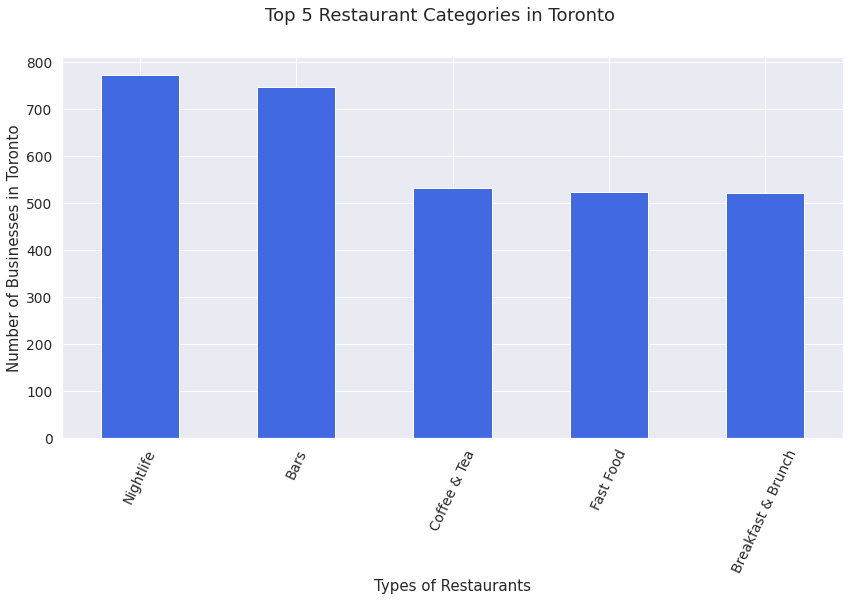

In [ ]:
# Distribution of Types of Restaurant Categories 

restaurant_categories = business_final.assign(categories = business_final.categories.str.split(', ')).explode('categories')
top25_categories = restaurant_categories.categories.value_counts().head(7)

fig, ax = plt.subplots(figsize=(14, 7))
fig.suptitle('Top 5 Restaurant Categories in Toronto', fontsize=18)

# Excluding the top 2 most generic categories: Restaurants & Food

top25_categories[2:].plot(kind = 'bar', color = 'royalblue')

plt.ylabel('Number of Businesses in Toronto', fontsize=15)
plt.xlabel('Types of Restaurants', fontsize=15)
plt.xticks(rotation=65)

The most popular Restaurant Categories in Toronto are: `Nightlife`, `Bars`, `Coffee & Tea`, `Fast Food` & `Breakfast & Brunch`.

In [ ]:
# Number of Unique Restaurant Categories

len(set(restaurant_categories['categories']))

353

There are a total of 353 unique Restaurant Categories.

In [ ]:
# Overview of 'Nightlife' type of Restaurants in Toronto

toronto_nightlife = business_final[business_final['categories'].str.contains("Nightlife")]
print(toronto_nightlife.shape)
toronto_nightlife.head() # 772 Nightlife type of Restaurants

(772, 12)


,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
5,cicPsia8Wj-DNRkmLbD_xg,The Keg Steakhouse + Bar,Toronto,ON,3.5,91,"Steakhouses, Restaurants, Nightlife, Seafood, ...",43.705842,-79.397841,1,M4S 2B2,cicPsia8Wj-DNRkmLbD_xg
7,xVXyrTWbG8U3szze-aA7eg,St. Louis Bar & Grill,Toronto,ON,2.0,34,"Nightlife, Sports Bars, Bars, Restaurants, Ame...",43.690144,-79.571658,1,M9W 1H7,xVXyrTWbG8U3szze-aA7eg
24,tqumNKvNmeII_DRG6SdRuw,Best Bite Bar & Grill,Toronto,ON,4.5,17,"Pubs, American (Traditional), Turkish, Nightli...",43.653043,-79.600593,1,M9C 5K5,tqumNKvNmeII_DRG6SdRuw
30,EwlA5wluJw5zzXxtA42brQ,Bar Centrale,Toronto,ON,4.0,5,"Restaurants, Bars, Wine Bars, Nightlife, Italian",43.680037,-79.390519,1,M4W 2L8,EwlA5wluJw5zzXxtA42brQ
50,UPmrHkx4YmNo_QRniekP8g,The Rose & Crown,Toronto,ON,3.5,53,"Sandwiches, Bars, Pubs, Music Venues, Restaura...",43.708653,-79.398246,1,M4P 2C8,UPmrHkx4YmNo_QRniekP8g


In [ ]:
toronto_nightlife.name.value_counts()

St. Louis Bar & Grill                8
Jack Astor's Bar & Grill             4
The Keg Steakhouse + Bar             3
Cibo Wine Bar                        3
Wild Wing                            3
                                    ..
For The Win Board Game Cafe & Bar    1
Nossa Casa Sports Cafe               1
Rally Restaurant and Bar             1
The Green Wood                       1
The Shore Club - Toronto             1
Name: name, Length: 738, dtype: int64

There 772 unique restaurant categories

Text(0, 0.5, 'Number of Restaurants')

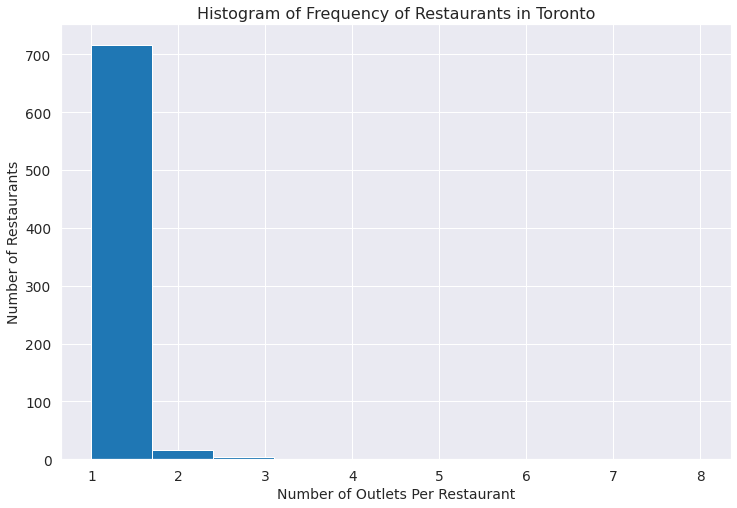

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.hist(toronto_nightlife.name.value_counts(), bins=10)
plt.title('Histogram of Frequency of Restaurants in Toronto', fontsize=16)
plt.xlabel('Number of Outlets Per Restaurant', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)

Based on the above value_count, we observe that there are multiple business entries for restaurants like `St. Louis Bar & Grill` and other restaurants as well, let's explore this further.

In [ ]:
toronto_stlouis = toronto_nightlife[toronto_nightlife['name'].str.contains("St. Louis Bar & Grill")]
toronto_stlouis

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
7,xVXyrTWbG8U3szze-aA7eg,St. Louis Bar & Grill,Toronto,ON,2.0,34,"Nightlife, Sports Bars, Bars, Restaurants, Ame...",43.690144,-79.571658,1,M9W 1H7,xVXyrTWbG8U3szze-aA7eg
695,dryad6tDgaGc-WsUUgPbfw,St. Louis Bar & Grill,Toronto,ON,3.0,59,"Bars, Sports Bars, Nightlife, Chicken Wings, A...",43.656584,-79.382704,1,M5G 2C2,dryad6tDgaGc-WsUUgPbfw
931,_ESIk0hZa3MdyxEsOlKv5Q,St. Louis Bar & Grill,Toronto,ON,2.5,56,"Sports Bars, Bars, Argentine, Nightlife, Itali...",43.663800,-79.384269,1,M4Y 1X9,_ESIk0hZa3MdyxEsOlKv5Q
1289,hBqp4v9iKsM-6i56v0MBuQ,St. Louis Bar & Grill,Toronto,ON,2.5,60,"Sports Bars, Bars, Barbeque, Nightlife, Americ...",43.777990,-79.344091,1,M2J 5A7,hBqp4v9iKsM-6i56v0MBuQ
4160,2vBo1wWJckBnGOHhxt9ecg,St. Louis Bar & Grill,Toronto,ON,2.5,81,"Sports Bars, Nightlife, Fast Food, Bars, Ameri...",43.640410,-79.390579,1,M5V 3V3,2vBo1wWJckBnGOHhxt9ecg
4614,Pube7dRYQoptIn0OA0GpdQ,St. Louis Bar & Grill,Toronto,ON,3.5,49,"Bars, Food, Sports Bars, Nightlife, Barbeque, ...",43.650073,-79.374891,1,M5C 2B8,Pube7dRYQoptIn0OA0GpdQ
4790,INJ-1LC57mpAsNspyb3CfA,St. Louis Bar & Grill,Toronto,ON,3.0,62,"Nightlife, Sports Bars, Bars, Restaurants, Chi...",43.701559,-79.397630,1,M4S 1Z9,INJ-1LC57mpAsNspyb3CfA
4804,mrwpkN8k5Q-X7J5mGQ0NtQ,St. Louis Bar & Grill,Toronto,ON,3.0,45,"Pubs, Nightlife, Sports Bars, Bars, Restaurant...",43.666300,-79.406203,1,M5S 1X2,mrwpkN8k5Q-X7J5mGQ0NtQ


For this Project, we are only focusing on Restaurant and food Businesses. As such, we will be restricting the categories that businesses can contain in our filtered dataset. Based on the above counts, we will be restricting these broad categories to: `Restaurants`, `Fast Food`, `Breakfast & Brunch`, `Cafes`.

In [ ]:
# Geographical Overview of St Louis Bar & Grill Outlets in Toronto

px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(toronto_stlouis, lat="latitude", lon="longitude", color="stars", size='review_count',
                   size_max=15, zoom=10, width=1000, height=600)
fig.show()

There are 8 branches of the `St. Louis Bar & Grill` Restaurant in Toronto, all across different locations, each having a different business ID key.

In [ ]:
# Sorting Toronto Restaurant Businesses based on the number of reviews per business

toronto_review_count = business_final.sort_values(by = 'review_count', ascending = False)
toronto_review_count

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
1699,r_BrIgzYcwo1NAuG9dLbpg,Pai Northern Thai Kitchen,Toronto,ON,4.5,2758,"Restaurants, Thai, Specialty Food, Food, Ethni...",43.647866,-79.388685,1,M5H 3G8,r_BrIgzYcwo1NAuG9dLbpg
4822,RtUvSWO_UZ8V3Wpj0n077w,KINKA IZAKAYA ORIGINAL,Toronto,ON,4.0,1592,"Restaurants, Tapas/Small Plates, Japanese, Bar...",43.660430,-79.378927,1,M5B 2A2,RtUvSWO_UZ8V3Wpj0n077w
3742,aLcFhMe6DDJ430zelCpd2A,Khao San Road,Toronto,ON,4.0,1542,"Thai, Restaurants",43.646411,-79.393480,1,M5V 2H5,aLcFhMe6DDJ430zelCpd2A
3494,iGEvDk6hsizigmXhDKs2Vg,Seven Lives Tacos Y Mariscos,Toronto,ON,4.5,1285,"Restaurants, Seafood, Mexican",43.654341,-79.400480,1,M5T 2K2,iGEvDk6hsizigmXhDKs2Vg
4502,N93EYZy9R0sdlEvubu94ig,Banh Mi Boys,Toronto,ON,4.5,1097,"Sandwiches, Restaurants, Food, Vietnamese, Asi...",43.648827,-79.396970,1,M5V 2A9,N93EYZy9R0sdlEvubu94ig
...,...,...,...,...,...,...,...,...,...,...,...,...
2172,NzMcsVtG1sSQHFXFwcgRFg,Lucky Dragon,Toronto,ON,2.0,3,"Restaurants, Chinese",43.718603,-79.455399,1,M6A 2T2,NzMcsVtG1sSQHFXFwcgRFg
4486,lhERIwIdVIE-yB_1P7utVg,Food Monks,Toronto,ON,1.0,3,"Home Services, Electricians, Plumbing, Food De...",43.829632,-79.254021,1,M1V 5G4,lhERIwIdVIE-yB_1P7utVg
1078,0dyd0nX-42VW1QQEoJq1TQ,Nossa Casa Sports Cafe,Toronto,ON,4.5,3,"Sports Bars, Nightlife, Sandwiches, Bars, Rest...",43.649342,-79.426482,1,M6J 1X8,0dyd0nX-42VW1QQEoJq1TQ
4494,fXYI--HjP8hCfwKfLZfTtg,Starbucks,Toronto,ON,2.0,3,"Cafes, Desserts, Coffee & Tea, Food, Restaurants",43.649616,-79.385447,1,M5H 2L2,fXYI--HjP8hCfwKfLZfTtg


In Toronto, the Restaurant that has the **highest reviews** has a total of **2,758 reviews** while the Restaurants with the **lowest reviews** has a total of **3 reviews.**

In [ ]:
toronto_review_count.review_count.value_counts()

3      376
4      258
5      223
6      198
7      168
      ... 
573      1
561      1
537      1
529      1
899      1
Name: review_count, Length: 412, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Number of Restaurants')

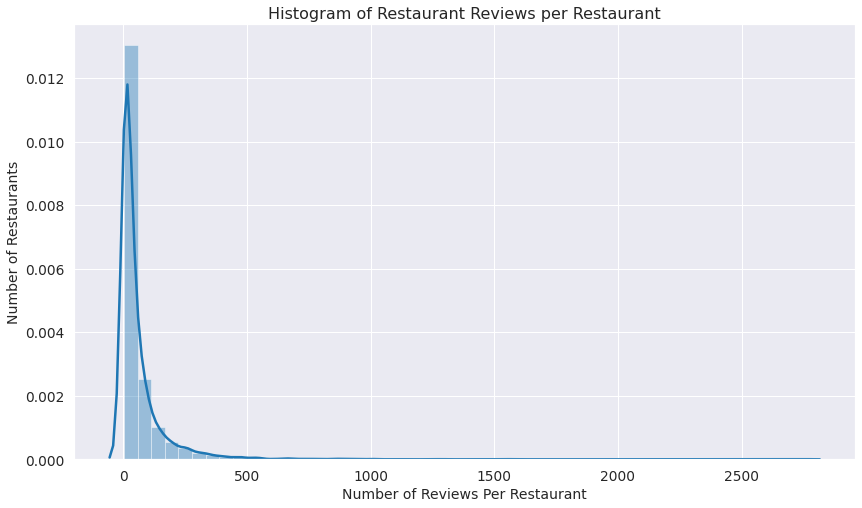

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(toronto_review_count['review_count'])
plt.title('Histogram of Restaurant Reviews per Restaurant', fontsize = 16)
plt.xlabel('Number of Reviews Per Restaurant', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)

## EDA on Reviews Data

In [ ]:
# Overview of Reviews Data

print(reviews_final.shape)
reviews_final.head(3)

(253050, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,6,19:04:10
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,8,16:25:12
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0,0,0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016,4,03:32:19


In [ ]:
# Overall Distribution of Restaurant Ratings from Yelp Users

data = reviews_final['stars'].value_counts().sort_index(ascending=False)

trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / reviews_final.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values
               )

# Create layout

layout = dict(title = 'Distribution Of {} Restaurant Ratings from Yelp Users'.format(reviews_final.shape[0]),
              xaxis = dict(title = 'Count'),
              yaxis = dict(title = 'Rating / Stars'))

# Create distribution plot

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

As seen from the above distribution plot, rating Scores are **skewed to the left** as most of the Ratings/Stars are 4 and 5 Scores.

# Sentiment Analysis

In [ ]:
reviews_final['text'].head()

0    In the heart of Chinatown, I discovered it enr...
1    Was super excited to bring my boyfriend to thi...
2    My absolutely favorite mushroom pizza in the c...
3    Been to this a couple of times. Excellent food...
4    The pizza is very, very good! We arrived 15 mi...
Name: text, dtype: object

To further make sense of the data in our reviews dataset, we will be performing sentiment analysis on the text content of the reviews to understand user sentiment on their overall emotional experience dining at different restaurants.

Based on the overal reviews distribution plot in the previous section, we will be classifying negative reviews as those whose Star/Rating was `1` or `2` while classifying positive reviews as those whose Star/Rating was `5`. The remainder of the reviews whose Star/Rating was `3` or `4` will be classified as neutral reviews.

## Negative Reviews

In [ ]:
# Filtering for negative reviews (one and two star)

one_star_reviews = reviews_final[reviews_final['stars'] == 1.0]
two_star_reviews = reviews_final[reviews_final['stars'] == 2.0]
negative_reviews = [one_star_reviews, two_star_reviews]
negative_reviews = pd.concat(negative_reviews)
print(negative_reviews.shape)
negative_reviews.sample(5)

(48496, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
135873,Lk2I8GTjKLd_R1drktNWNg,1pic7w8rRsVO5GJ_qUw0tg,1.0,3,0,0,Service was inadequate and slow. BBQ chicken w...,2016-06-29 20:01:32,2016,6,20:01:32
83410,u2ETlHOcFdRz4BxcdfsK0Q,AxjBO9RSA_70Peaw8DnzmQ,1.0,0,0,0,"I am heart broken, This used to be be by far t...",2017-06-01 22:46:40,2017,6,22:46:40
24669,gvM3YlaP8HWenylTkGFYUw,9bs-y2kiWc2mCgmuEU5n_g,1.0,1,0,0,The worst bbq I have ever had. Pork sandwich: ...,2018-07-19 01:52:47,2018,7,01:52:47
194467,BOml4YRmKqx7MiEVvlUadg,shDL_Gioo3M9FDbkT6wnOQ,1.0,0,0,0,I used to frequent this place all the time. Ov...,2017-10-09 21:30:55,2017,10,21:30:55
221915,hDy-uY7Vy_TZdGBzw59lhA,YqMpcRUA0OMw1WNLDGoj-A,2.0,1,0,0,A shell of what it used to be. It was 11/10 be...,2019-09-26 20:17:20,2019,9,20:17:20


We have `48,496` rows of reviews data classified as **Negative Reviews.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



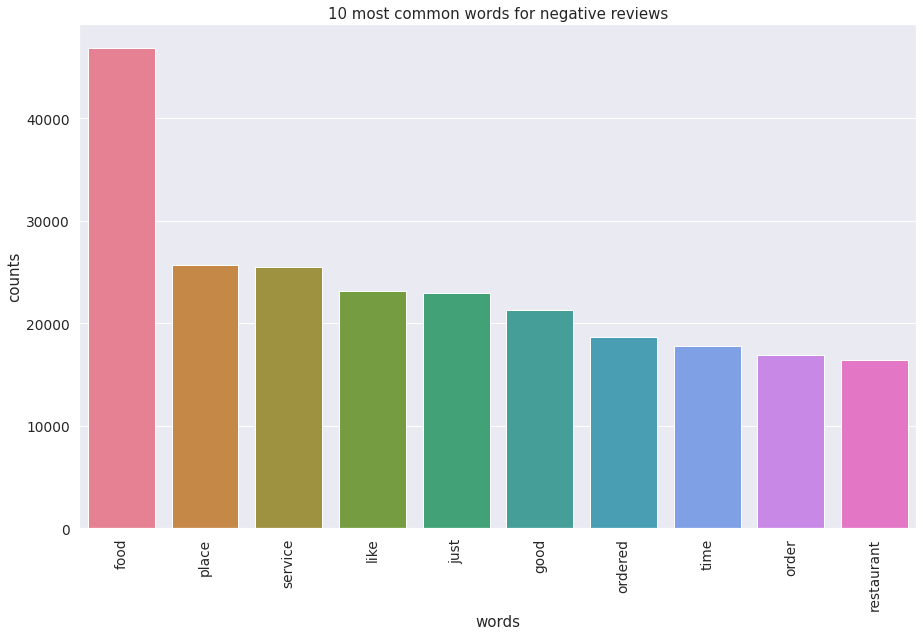

In [ ]:
## Sentiment Analysis for Negative Reviews

def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words for negative reviews')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(negative_reviews['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

Words like `food`, `like`, `good`, `restaurant`, `place` are freqeuent words in negative reviews but on their own they are not very informative about the sentiment of negative reviews. Hence, we will look to remove these words before plotting our word cloud.

In [ ]:
# Let's use the stop_words argument to remove words like "and, the, a"

stopwords = set(stopwords.words('english'))
cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(negative_reviews['text'])

# Transforming using our fitted cvec and converting the result to a DataFrame

negative_words = pd.DataFrame(cvec.transform(negative_reviews['text']).todense(),
                       columns=cvec.get_feature_names())

negative_top = negative_words.sum(axis = 0).sort_values(ascending = False).head(150)
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food','like', 'restaurant', 'place', 'good'], inplace = True)
negative_top.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,service,us,one,would,ordered,time,order,back,get,came,even,go,really,chicken,got,table,asked,also,never,said,better,minutes,come,server,bad,...,sushi,best,day,hour,busy,burger,waited,served,side,dry,money,maybe,tables,waiter,pay,20,fresh,friends,recommend,bland,fried,hot,coming,overall,fish
0,0,0,0,1,1,2,1,0,4,1,0,1,0,0,1,2,0,0,2,1,0,5,1,2,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0
1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,1,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,0,0,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,2,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,1,0,0,2,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


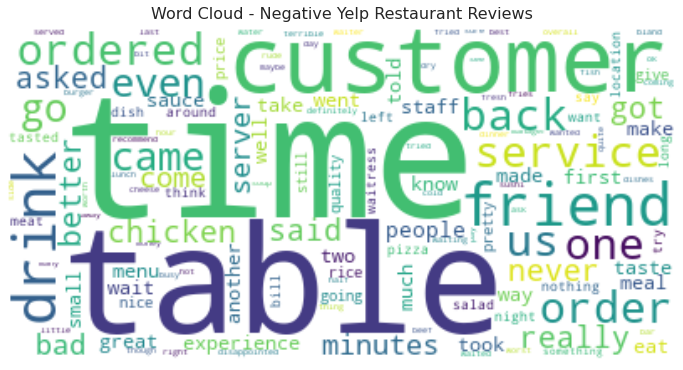

In [ ]:
# Generate Word Cloud

wordcloud_low = WordCloud(background_color="white").generate(' '.join(negative_top))
plt.figure(figsize = (12,10))
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.title('Word Cloud - Negative Yelp Restaurant Reviews', fontsize=16, y=1.01)
plt.axis("off");

In [ ]:
negative_reviews['counter'] = 1
negative_reviews.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,counter
5,tJcpzXzykNSLuzWwa1JQUw,6WmMHMBM4FLGyK98-reecA,1.0,1,1,1,With many eateries to chose from on queen stre...,2016-05-31 01:21:11,2016,5,01:21:11,1
16,L0T0tx47qXd15FOrLoKUng,w0G2GjGZrrzSwOr__j4B4w,1.0,2,0,0,Ordered on Ritual but was not rdy when i went ...,2018-02-23 22:35:50,2018,2,22:35:50,1
25,E-wETrdq1uImd6lX6x8Qxw,ymaFC3h-gqHwtzVznQw5JQ,1.0,2,0,0,"If there is negative rating, I will choose for...",2016-07-25 07:27:02,2016,7,07:27:02,1
57,qcqDjeirxvdgW5kQVkEwSA,jsPWBtGTB0_jm-IW0y1KWw,1.0,1,1,0,I didn't HATE the place! Hate is a strong word...,2016-02-23 20:36:11,2016,2,20:36:11,1
58,8QwAWJJ1FtICnE266xISMQ,gLsv77ETHn04kiFZwQIOJw,1.0,0,2,0,I have never written a yelp review. Ever. This...,2017-01-02 06:51:30,2017,1,06:51:30,1


In [ ]:
# Sorting Restaurants based on number of reviews

negative_reviews.groupby('business_id')['counter'].sum().sort_values(ascending = False)

business_id
zgQHtqX0gqMw1nlBZl2VnQ    189
a8pmtlVKf7NiSLI-4KejIw    186
L3R7y3_tUKQlM9kor4-Ccw    177
RwRNR4z3kY-4OsFqigY5sw    175
O1TvPrgkK2bUo5O5aSZ7lw    142
                         ... 
d_BYcwM3_TDqYOoxFBNYXg      1
rZY8wtc4EyC_8o1mI2-_1A      1
dZxvdUmMp81stCt1SwKRiw      1
7mIBNG1OnTdDXg1ojrJvnw      1
V60xPUhZ88IJYnR4mJE92w      1
Name: counter, Length: 4755, dtype: int64

In [ ]:
# Restaurant with most negative reviews

worst_restaurant = business_final[business_final['business_id '] == 'zgQHtqX0gqMw1nlBZl2VnQ']
worst_restaurant

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
4137,zgQHtqX0gqMw1nlBZl2VnQ,Momofuku Noodle Bar,Toronto,ON,3.0,1010,"Chinese, Soup, Ramen, Japanese, American (New)...",43.649678,-79.386275,1,M5H 0A3,zgQHtqX0gqMw1nlBZl2VnQ


In [ ]:
# Filtering Reviews from the Worst Restaurant

worst_restaurant_reviews = negative_reviews[negative_reviews['business_id'] == 'zgQHtqX0gqMw1nlBZl2VnQ']
worst_restaurant_reviews

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,counter
175238,zgQHtqX0gqMw1nlBZl2VnQ,zmHpLrDO7pgOQ6_cnea_Qw,1.0,0,0,0,"David Chang, seriously wth is wrong with you. ...",2018-06-08 23:39:04,2018,6,23:39:04,1
175408,zgQHtqX0gqMw1nlBZl2VnQ,-Bflypa8Ds0h4nR7Qgea9Q,1.0,1,0,1,I visited Momofuku Noodle Bar when it first op...,2018-07-26 15:01:50,2018,7,15:01:50,1
176188,zgQHtqX0gqMw1nlBZl2VnQ,yEP9vNFq3edLldNzhm6hgQ,1.0,0,0,0,I've heard so many things before I went there ...,2018-07-08 21:14:44,2018,7,21:14:44,1
176258,zgQHtqX0gqMw1nlBZl2VnQ,kJN998lZUKPbzYX3qSLc5Q,1.0,0,0,0,This was very disappointing given this is the ...,2017-04-20 02:30:09,2017,4,02:30:09,1
176382,zgQHtqX0gqMw1nlBZl2VnQ,fM6SUpG8c5THjmf7_DblZg,1.0,0,0,0,"Ramen is lacking flavourful broth, and does no...",2016-04-12 16:01:08,2016,4,16:01:08,1
...,...,...,...,...,...,...,...,...,...,...,...,...
196322,zgQHtqX0gqMw1nlBZl2VnQ,6UV-2-QMTZnm_myN4Bxvxw,2.0,0,0,0,Sat at the upstairs bar. The bartender made me...,2019-02-20 21:44:46,2019,2,21:44:46,1
196379,zgQHtqX0gqMw1nlBZl2VnQ,9FAGUsVR7kgPO9XYNwiFKA,2.0,3,3,1,"Momofuku, I disliked you, then I loved you, an...",2019-07-06 22:32:12,2019,7,22:32:12,1
197056,zgQHtqX0gqMw1nlBZl2VnQ,qyZTCjP6c7CV-mEVpLGotQ,2.0,0,0,0,Not my favorite ramen place and even the winte...,2019-04-21 19:33:55,2019,4,19:33:55,1
197271,zgQHtqX0gqMw1nlBZl2VnQ,VwlyMlqexrfb3tnut812XQ,2.0,0,0,0,Their ramen is just 'okay'. Nothing special. D...,2019-04-30 03:48:19,2019,4,03:48:19,1


In [ ]:
# Let's use the stop_words argument to remove words like "and, the, a"

cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(worst_restaurant_reviews['text'])

# Transforming using our fitted cvec and converting the result to a DataFrame

negative_words = pd.DataFrame(cvec.transform(worst_restaurant_reviews['text']).todense(),
                       columns=cvec.get_feature_names())

negative_top = negative_words.sum(axis = 0).sort_values(ascending = False).head(300)
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food','like', 'restaurant', 'place', 'good', 'better', 'great','noodles', 'ramen', 'pork', 'chicken', 'noodle', 'momofuku','nice','bar', 'broth', 'really', 'much','one','belly','bun', 'buns','even', 'us', 'got', 'go', 'came','milk'], inplace = True)
negative_top.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,would,service,get,ordered,back,time,also,come,experience,table,taste,bad,way,try,toronto,price,spicy,well,fried,ice,disappointed,tasted,nothing,people,order,...,ask,compared,waiting,leave,baos,hard,gave,tastes,hand,guess,everyone,heard,three,paying,hostess,hotel,truffle,lacked,walk,literally,whole,mind,12,huge,low
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
column_list = list(negative_top)
negative_words = negative_top[column_list].sum(axis=0)
negative_words = negative_words.to_frame(name = 'sum').reset_index()
negative_words.set_index('index',inplace = True)
negative_words.to_csv("clean_data/negative_words.csv")

In [ ]:
negative_words.shape

(272, 1)

In [ ]:
thumbs_down = stylecloud.gen_stylecloud(file_path="clean_data/negative_words.csv", 
                                        icon_name = "fas fa-thumbs-down",
                                        size = 550,
                                        palette="colorbrewer.sequential.RdPu_3", 
                                        background_color="white",
                                        output_name = 'clean_data/Negative_Reviews.png')

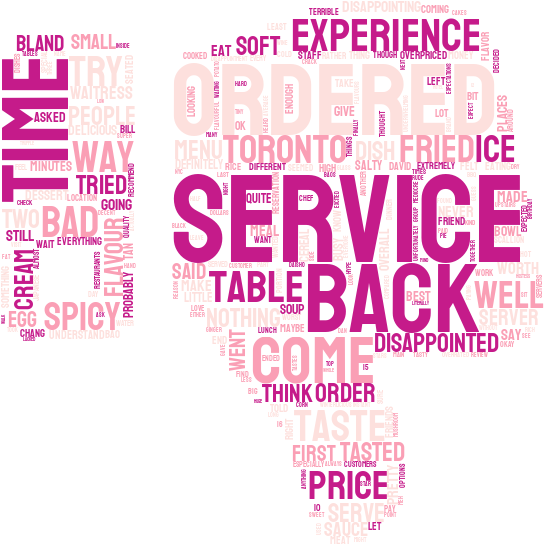

In [ ]:
from IPython.display import Image
Image(filename='clean_data/Negative_Reviews.png')

## Positive Reviews

In [ ]:
# Filtering for positive reviews (five star)

positive_reviews = reviews_final[reviews_final['stars'] == 5.0]
print(positive_reviews.shape)
positive_reviews.sample(5)

(86573, 11)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
103238,mzREMIknfmagJugibXrCsQ,B6qAnJgR9hN0EO8oGQDnlw,5.0,0,0,0,Best pho I've had. Price was very good for a l...,2017-06-19 01:46:04,2017,6,01:46:04
129129,tHlJKmUECTlj2amcGG0TOQ,2keVmmHdVifFoyPM3ZLKqw,5.0,0,0,0,My greatest disappointment is that this is no ...,2018-07-19 23:40:27,2018,7,23:40:27
5671,PD3ganU8NAGkqkcIXYPSxQ,fWaFyO9WKC4C7u47SKD-9w,5.0,0,0,0,I have been here several times and it's become...,2017-12-06 17:49:42,2017,12,17:49:42
85120,DE89UdHFMCN6DtYWZuer5A,uee_1ho6P5yRnmUJEXL6GQ,5.0,0,0,0,Lunch at Santouka gets pretty busy. We arrived...,2017-10-21 22:39:00,2017,10,22:39:00
172738,G_6iKqKNZUzxttjCp258iw,b7l5ZDcKOFbm6zA71MQynw,5.0,0,0,0,I love this place. Their waffles are amazing! ...,2019-07-12 14:09:49,2019,7,14:09:49


We have `86,573` rows of reviews data classified as **Positive Reviews.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



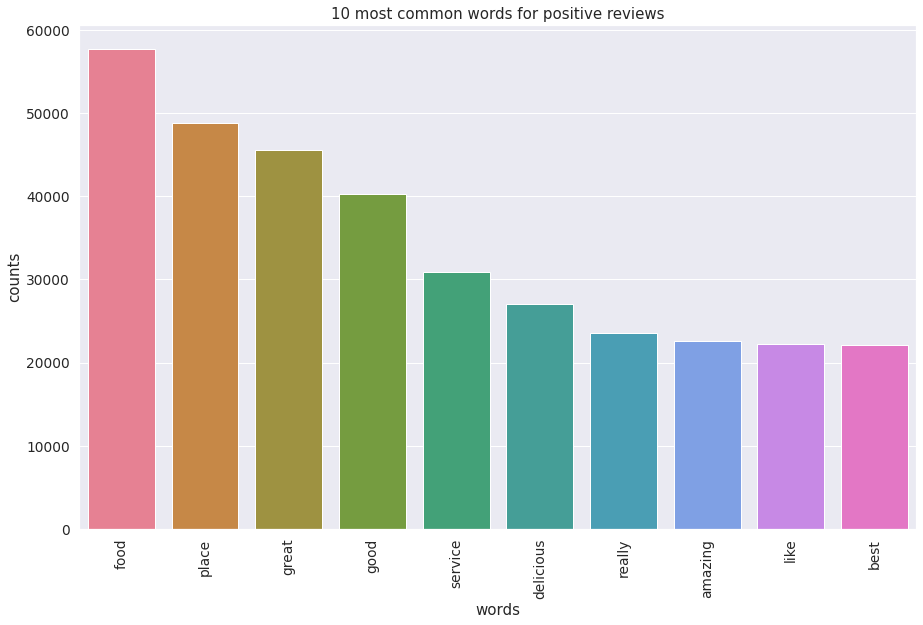

In [ ]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words for positive reviews')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

## Sentiment Analysis for high rated reviews
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(positive_reviews['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
# Let's use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)

cvec.fit(positive_reviews['text'])

positive_words = pd.DataFrame(cvec.transform(positive_reviews['text']).todense(),
                       columns=cvec.get_feature_names())

positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(100)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food','like', 'restaurant', 'place', 'really'], inplace = True)
positive_top.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,great,good,service,delicious,one,also,amazing,back,best,time,definitely,go,chicken,get,would,well,try,love,friendly,menu,ordered,nice,fresh,toronto,staff,...,quality,atmosphere,highly,price,spot,two,favourite,cheese,sweet,take,table,meat,tasty,pretty,sure,loved,side,never,soup,could,hot,day,fish,bar,around
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,0,1,0,0,1,0,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0
3,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


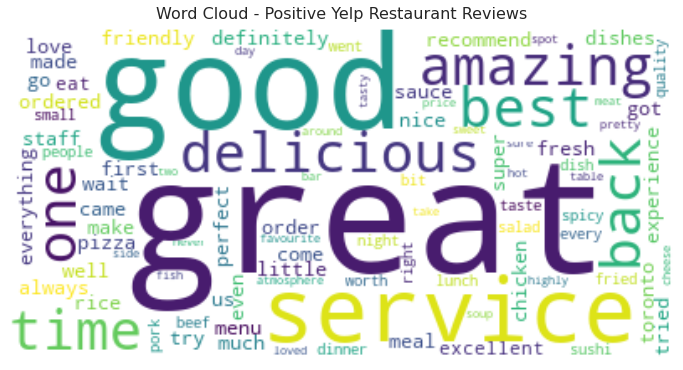

In [ ]:
# Generate Word Cloud

wordcloud_high = WordCloud(background_color="white").generate(' '.join(positive_top))
plt.figure(figsize = (12,10))
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.title('Word Cloud - Positive Yelp Restaurant Reviews', fontsize=16, y=1.01)
plt.axis("off");

In [ ]:
positive_reviews['counter'] = 1
positive_reviews.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,counter
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0,0,0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016,4,03:32:19,1
3,PMPMHHLe9vFzcR67iCjgLA,RRhco4irDXPk5EJmvuwr2w,5.0,0,0,2,Been to this a couple of times. Excellent food...,2016-01-17 05:23:59,2016,1,05:23:59,1
6,28adZ4lsuUeVB2aWzohK9g,BwwqlPVsJk1dbUyNwCWB7Q,5.0,0,0,0,Amazing place! My co-workers and I went here o...,2017-11-06 22:08:35,2017,11,22:08:35,1
7,uG0yvj2JWfCf0eaIgxcwXQ,yiLiYYg6MM7Pmuo6jPY4Nw,5.0,0,0,0,"This place is very small and cozy, but what I ...",2015-03-07 13:40:01,2015,3,13:40:01,1
18,Gc8xWVpbUlBYHAoOT9MTyQ,qRJQFRwFbKFx5-j3pwGRPQ,5.0,0,0,0,"My wife really enjoyed the tasty foods, had th...",2017-01-14 20:43:51,2017,1,20:43:51,1


In [ ]:
# Sorting Restaurants Based on Most Reviews

positive_reviews.groupby('business_id')['counter'].sum().sort_values(ascending = False)

business_id
r_BrIgzYcwo1NAuG9dLbpg    1480
iGEvDk6hsizigmXhDKs2Vg     619
RtUvSWO_UZ8V3Wpj0n077w     460
Yl2TN9c23ZGLUBSD9ks5Uw     437
mZRKH9ngRY92bI_irrHq6w     380
                          ... 
pMaOpte9NXZXSS8wolXxGw       1
G_6iKqKNZUzxttjCp258iw       1
GW5oBBgoznV97tIap_WRZw       1
GLKVAHzymmr3rjDp7vE1WQ       1
V_P9yqnmr9Ol42VWfFjW4g       1
Name: counter, Length: 4742, dtype: int64

In [ ]:
# Restaurant with most positive reviews

best_restaurant = business_final[business_final['business_id '] == 'r_BrIgzYcwo1NAuG9dLbpg']
best_restaurant

,business_id,name,city,state,stars,review_count,categories,latitude,longitude,is_open,postal_code,key
1699,r_BrIgzYcwo1NAuG9dLbpg,Pai Northern Thai Kitchen,Toronto,ON,4.5,2758,"Restaurants, Thai, Specialty Food, Food, Ethni...",43.647866,-79.388685,1,M5H 3G8,r_BrIgzYcwo1NAuG9dLbpg


In [ ]:
best_restaurant_reviews = positive_reviews[positive_reviews['business_id'] == 'r_BrIgzYcwo1NAuG9dLbpg']
best_restaurant_reviews

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,counter
73016,r_BrIgzYcwo1NAuG9dLbpg,jAeS5gLhSQCRilgQWI2fbw,5.0,0,0,0,I've been to all of Regular's restaurants in T...,2016-04-11 17:21:26,2016,4,17:21:26,1
73028,r_BrIgzYcwo1NAuG9dLbpg,Ikx6jnqAqgtd9GojOzx6qw,5.0,1,0,0,I think they have the best Thai food in Toront...,2018-05-28 21:07:33,2018,5,21:07:33,1
73056,r_BrIgzYcwo1NAuG9dLbpg,GG4QPrqU7wxL8WVXuzozMg,5.0,0,0,0,This place is delicious with great service and...,2017-07-08 18:13:21,2017,7,18:13:21,1
73065,r_BrIgzYcwo1NAuG9dLbpg,nnfbZsY3Z_wTGg3ZC94E_A,5.0,0,0,0,"Came back again, this time for lunch. Service ...",2015-05-12 18:18:55,2015,5,18:18:55,1
73093,r_BrIgzYcwo1NAuG9dLbpg,az5i_59nAi-CzmQLYf7SUg,5.0,0,0,0,I can understand why people are raving about t...,2017-09-20 16:35:52,2017,9,16:35:52,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99912,r_BrIgzYcwo1NAuG9dLbpg,-OdDuxIDxJq0KO8zDd2zZw,5.0,0,0,0,Hate to admit it because I'm from Los Angeles ...,2019-11-21 18:42:57,2019,11,18:42:57,1
99925,r_BrIgzYcwo1NAuG9dLbpg,RBWhXf8i7xnG5Cc-oG_W_Q,5.0,0,0,0,I lucked into this gem unplanned and was so gl...,2019-10-24 11:00:50,2019,10,11:00:50,1
99981,r_BrIgzYcwo1NAuG9dLbpg,rbVuebrHrOnqPXaO-oA1XQ,5.0,0,0,0,A true lover of Thai food this restaurant blew...,2019-12-12 14:13:19,2019,12,14:13:19,1
100000,r_BrIgzYcwo1NAuG9dLbpg,KLq-7i65Rx2Ep51vk_ynYw,5.0,0,0,0,"Funky, cool, and delicious! We loved our visit...",2019-12-04 00:28:26,2019,12,00:28:26,1


In [ ]:
# Let's use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)

cvec.fit(best_restaurant_reviews['text'])

positive_words = pd.DataFrame(cvec.transform(best_restaurant_reviews['text']).todense(),
                       columns=cvec.get_feature_names())

positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(300)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food','like', 'restaurant', 'place', 'really', 'thai', 'pad', 'pai', 'khao'], inplace = True)
positive_top.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,great,curry,good,wait,best,delicious,toronto,service,time,amazing,get,go,one,chicken,definitely,beef,soi,ordered,would,back,dish,green,also,rice,love,...,things,extremely,especially,saturday,start,seating,wish,appetizers,review,able,although,visiting,dining,satay,mild,size,kind,point,server,date,room,creamy,sangria,left,maybe
0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,1,0,1,0,0,1,1,0,1,0,0,1,0,2,0,0,0,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
column_list = list(positive_top)
positive_words = positive_top[column_list].sum(axis=0)
positive_words = positive_words.to_frame(name = 'sum').reset_index()
positive_words.set_index('index',inplace = True)
positive_words.to_csv("clean_data/positive_words.csv")

In [ ]:
thumbs_up = stylecloud.gen_stylecloud(file_path="clean_data/positive_words.csv", 
                                        icon_name = "fas fa-thumbs-up",
                                        size = 550,
                                        palette="colorbrewer.sequential.Greens_5", 
                                        background_color="white",
                                        output_name = 'clean_data/Positive_Reviews.png')

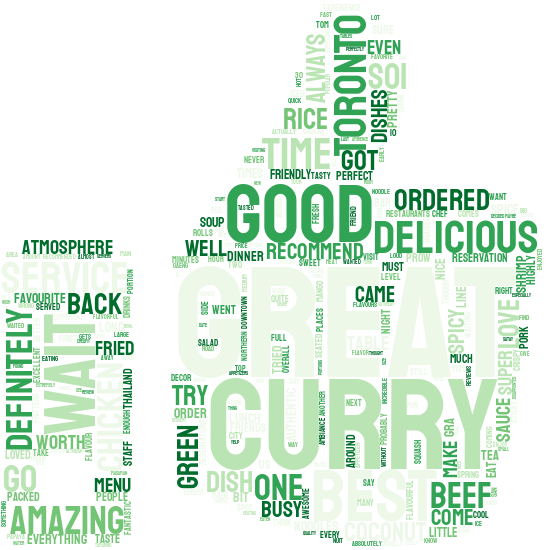

In [ ]:
Image(filename='clean_data/Positive_Reviews.png')

## Creating New Feature Columns

In [ ]:
reviews_final.head(3)

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,6,19:04:10
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,8,16:25:12
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0,0,0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016,4,03:32:19


To gain more insights into the text reviews, we will be creating several new columns: `review word count`, `review character count`, `average review length`,  `number of stopwords`.

In [ ]:
## Creating new feature columns
# Calculate reviews word count

reviews_final['word_count'] = reviews_final['text'].apply(lambda x: len(str(x).split(" ")))

# Calculate reviews character count

reviews_final['char_count'] = reviews_final['text'].str.len()

# Calculate average review length

def avg_word(review):
  words = review.split()
  return (sum(len(word) for word in words) / len(words))

reviews_final['avg_word_len'] = reviews_final['text'].apply(lambda x: avg_word(x))

# Calculate number of stop words in reviews

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
reviews_final['stopword_count'] = reviews_final['text'].apply(lambda x: len([x for x in x.split() if x in stopwords]))

reviews_final.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,6,19:04:10,244,1442,4.709163,93
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,8,16:25:12,233,1323,4.659483,92
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0,0,0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016,4,03:32:19,43,240,4.829268,13
3,PMPMHHLe9vFzcR67iCjgLA,RRhco4irDXPk5EJmvuwr2w,5.0,0,0,2,Been to this a couple of times. Excellent food...,2016-01-17 05:23:59,2016,1,05:23:59,28,148,4.321429,11
4,tWdp26XQEJqJGnRmFVJQxA,IeojscL3rg3x3vtmR-hWlA,4.0,0,0,0,"The pizza is very, very good! We arrived 15 mi...",2018-07-17 01:49:01,2018,7,01:49:01,20,121,5.100000,7


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Reviews')

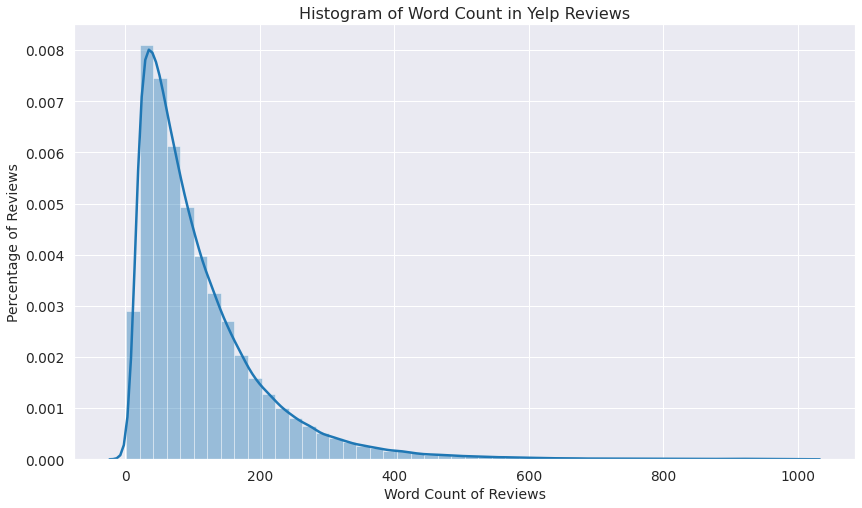

In [ ]:
# Histogram of Word Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(reviews_final['word_count'])
plt.title('Histogram of Word Count in Yelp Reviews', fontsize = 16)
plt.xlabel('Word Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Reviews', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Reviews')

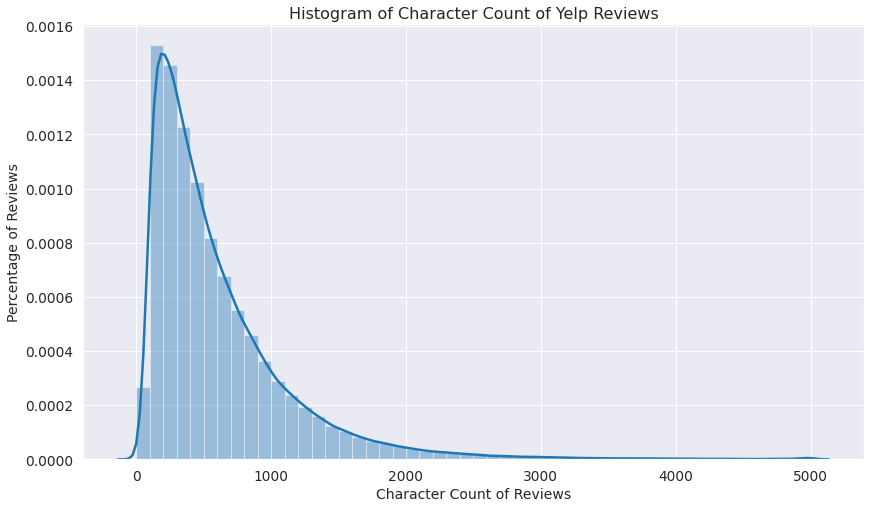

In [ ]:
# Histogram of Character Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(reviews_final['char_count'])
plt.title('Histogram of Character Count of Yelp Reviews', fontsize = 16)
plt.xlabel('Character Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Reviews', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Restaurants')

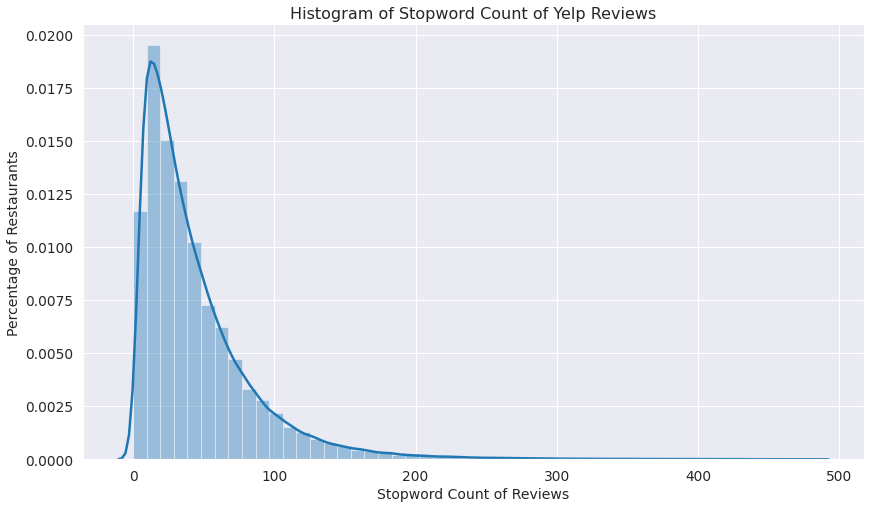

In [ ]:
# Histogram of Stopword Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(reviews_final['stopword_count'])
plt.title('Histogram of Stopword Count of Yelp Reviews', fontsize = 16)
plt.xlabel('Stopword Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

Based on these distributions, we can see that the distributions of `Word_count`, `Char_count` and `Stopword_count` are **skewed to the right.** Most of the Yelp Reviews are relatively short and as the length of reviews increase, the less we such reviews appearing in our dataset.

In [ ]:
# Average Word Length of Review for different Stars/Ratings
reviews_final.groupby('stars')['word_count'].mean()

stars
1.0    124.767896
2.0    131.809699
3.0    128.936746
4.0    114.524327
5.0     90.898294
Name: word_count, dtype: float64

In [ ]:
stars_wordcount = reviews_final.groupby('stars')['word_count'].mean()
stars_wordcount = stars_wordcount.to_frame(name = 'sum').reset_index()
stars_wordcount

,stars,sum
0,1.0,124.767896
1,2.0,131.809699
2,3.0,128.936746
3,4.0,114.524327
4,5.0,90.898294


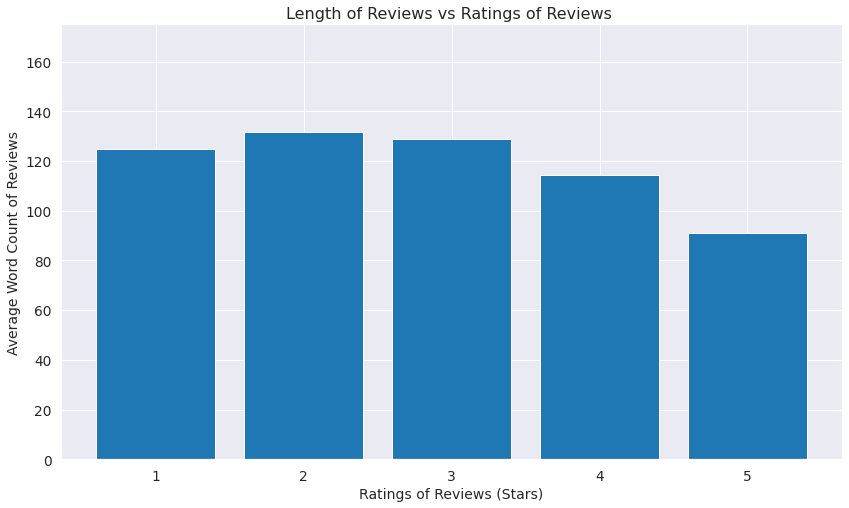

In [ ]:
# Distribution of Length of Reviews vs Ratings of Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
plt.bar(stars_wordcount['stars'],stars_wordcount['sum'])
plt.title('Length of Reviews vs Ratings of Reviews ', fontsize = 16)
plt.xlabel('Ratings of Reviews (Stars)', fontsize=14)
plt.ylabel('Average Word Count of Reviews', fontsize=14)
plt.ylim((0,175))
plt.show()

Based on the distribution plot, **negative reviews** (1 and 2 Stars) are on average longer in word length as compared to **positive reviews** (5 Stars).

## Text Processing

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Import Textblob

from textblob import Word

# Splitting up words in reviews

reviews_final['cleaned_text'] = reviews_final['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove Punctuation

reviews_final['cleaned_text'] = reviews_final['cleaned_text'].str.replace('[^\w\s]', '')

# Remove Stopwords

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
reviews_final['cleaned_text'] = reviews_final['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

# Lemmatizing cleaned text

reviews_final['cleaned_text'] = reviews_final['cleaned_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviews_final.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,6,19:04:10,244,1442,4.709163,93,heart chinatown discovered enroute kensington ...
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,8,16:25:12,233,1323,4.659483,92,super excited bring boyfriend scaddabush locat...
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0,0,0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016,4,03:32:19,43,240,4.829268,13,absolutely favorite mushroom pizza city great ...
3,PMPMHHLe9vFzcR67iCjgLA,RRhco4irDXPk5EJmvuwr2w,5.0,0,0,2,Been to this a couple of times. Excellent food...,2016-01-17 05:23:59,2016,1,05:23:59,28,148,4.321429,11,couple time excellent food good price love tea...
4,tWdp26XQEJqJGnRmFVJQxA,IeojscL3rg3x3vtmR-hWlA,4.0,0,0,0,"The pizza is very, very good! We arrived 15 mi...",2018-07-17 01:49:01,2018,7,01:49:01,20,121,5.100000,7,pizza good arrived 15 minute closing time rest...


## Text Classification Using Textblob

Sentiment analysis is the process of determining the attitude or the emotion of the writer/user, i.e., whether it is positive or negative or neutral.

The sentiment function of **textblob** returns two properties: **polarity** and **subjectivity**.

**Polarity** is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

**Subjective** sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:
# Calculate polarity and subjectivity score

from textblob import TextBlob

reviews_final['polarity'] = reviews_final['cleaned_text'].apply(lambda x: TextBlob(x).sentiment[0])
reviews_final['subjectivity'] = reviews_final['cleaned_text'].apply(lambda x: TextBlob(x).sentiment[1])
reviews_final.head(3)

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,6,19:04:10,244,1442,4.709163,93,heart chinatown discovered enroute kensington ...,0.213835,0.532102
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,8,16:25:12,233,1323,4.659483,92,super excited bring boyfriend scaddabush locat...,0.188048,0.440286
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0,0,0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016,4,03:32:19,43,240,4.829268,13,absolutely favorite mushroom pizza city great ...,0.400000,0.690000


## Vader Sentiment Analysis

**VADER (Valence Aware Dictionary and Sentiment Reasoner)** is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of lexical features (e.g. words) which are generally labelled according to their semantic orientation as either positive or negative.

VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells us about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is through the **compound score**.

The **compound score** is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).

In [ ]:
!pip install vaderSentiment

In [ ]:
# Calculate Vader Sentiment Analysis Scores

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiment = reviews_final['text'].apply(lambda x: analyzer.polarity_scores(x))
reviews_final = pd.concat([reviews_final,sentiment.apply(pd.Series)],1)
reviews_final.sample(5)

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
245529,yFQCdWr_k1pTObzHPGis9Q,7zYzh419UZ50WsTsv5cKxQ,5.0,1,0,0,Ordered quinoa Mac n cheese with pulled pork \...,2018-02-24 05:34:39,2018,2,05:34:39,33,200,4.714286,7,ordered quinoa mac n cheese pulled pork 810 ma...,0.675000,0.825000,0.034,0.687,0.279,0.9191
164810,Dv0OHpQSL4hOGl2KAEVvlA,rFL3BIgdWQrUMa5fMJ24zw,4.0,1,0,0,Service: 5/5 Despite heavy foot traffic & high...,2018-10-31 23:18:44,2018,10,23:18:44,92,569,4.957895,20,service 55 despite heavy foot traffic high num...,0.175128,0.531282,0.000,0.791,0.209,0.9684
201532,KxHDiCOhHWQu_VOw8DMfJA,k1tnTuz_sWsJSVCT37F4TA,4.0,0,0,0,Excellent local pub. Pretty good food although...,2018-09-05 20:16:35,2018,9,20:16:35,17,95,4.937500,3,excellent local pub pretty good food although ...,0.429762,0.557143,0.074,0.430,0.496,0.8957
3645,geQG2a9uO6Q9hXVx937Kbw,v0xY2k1MwcFUrizihDpdzA,1.0,0,0,0,I'm not sure if I came at a bad time but the s...,2017-03-19 06:58:41,2017,3,06:58:41,100,515,4.160000,43,im sure came bad time staff werent friendly to...,0.174459,0.566631,0.089,0.814,0.097,0.5919
139977,Cj5Q45PySkj4ld67S1yL0w,B44Sr0ooWKvzcVC54ehPNg,1.0,2,1,0,This place just scammed me by overcharging for...,2017-04-11 21:58:02,2017,4,21:58:02,36,187,4.222222,15,place scammed overcharging gatorade hate busin...,-0.350000,0.850000,0.304,0.696,0.000,-0.9324


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Restaurants')

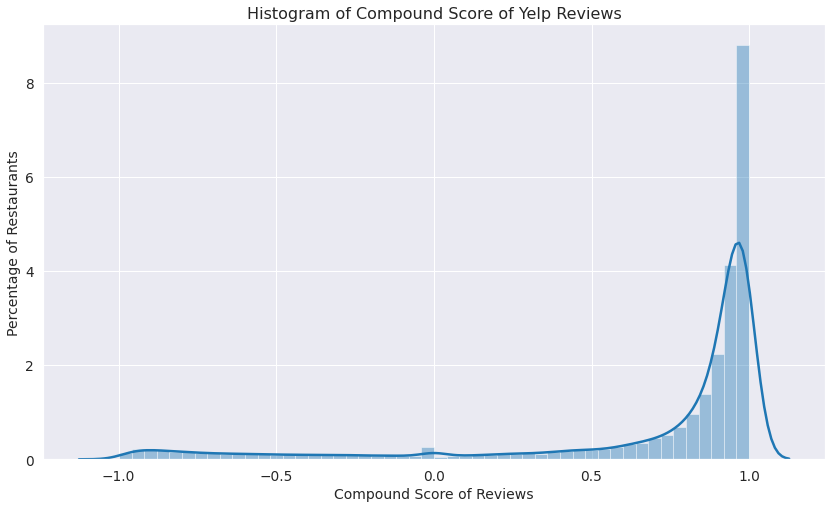

In [ ]:
# Histogram of Compound Score of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(reviews_final['compound'])
plt.title('Histogram of Compound Score of Yelp Reviews', fontsize = 16)
plt.xlabel('Compound Score of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

This distribution is **skewed to the left** and we can infer that the majority of reviews have a compound score near **1.0** indicating that most reviews are positive reviews based on the Vader Sentiment Analysis. This is interesting when we compare this to the distribution of polarity score of the reviews as it has a more normal distribution.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Restaurants')

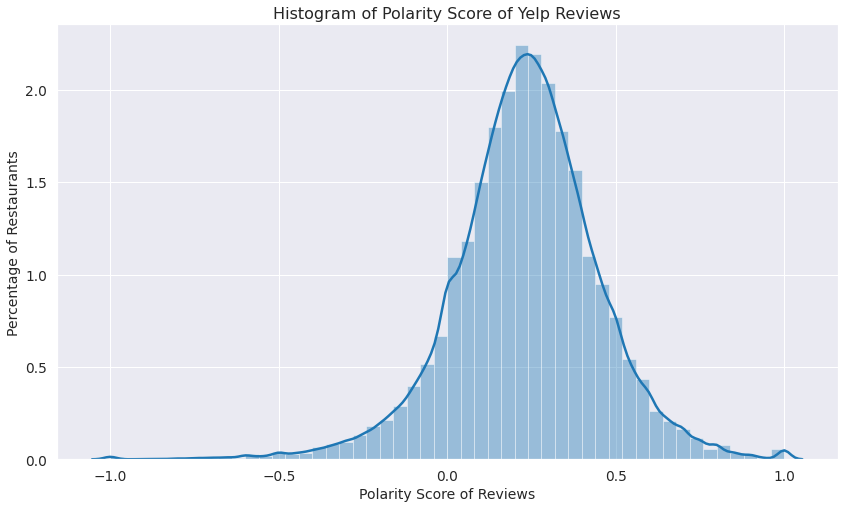

In [ ]:
# Histogram of Polarity Score of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(reviews_final['polarity'])
plt.title('Histogram of Polarity Score of Yelp Reviews', fontsize = 16)
plt.xlabel('Polarity Score of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Restaurants')

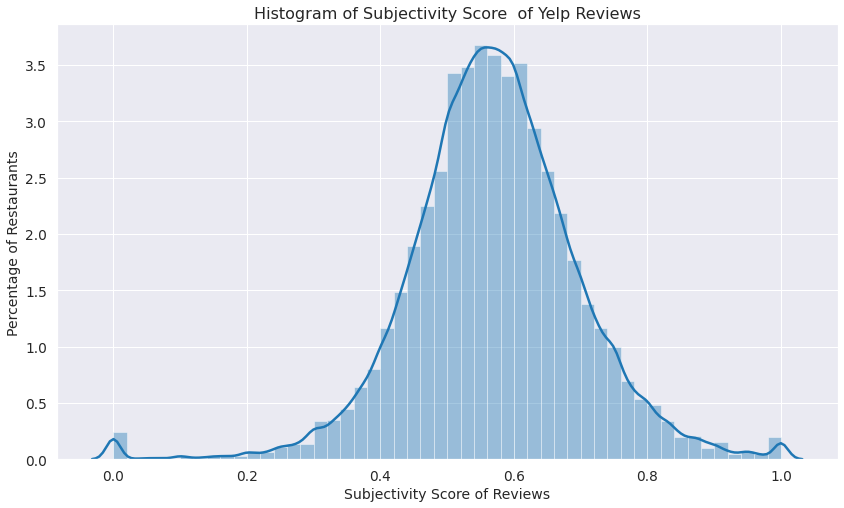

In [ ]:
# Histogram of Subjectivity Score of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(reviews_final['subjectivity'])
plt.title('Histogram of Subjectivity Score  of Yelp Reviews', fontsize = 16)
plt.xlabel('Subjectivity Score of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

This distribution also follows a normal distribution and we can infer that on average, the majority of reviews are balanced between being subjective and objective.

Now that we have generated a few more sentiment scores, we will be combining these scores later on to build our super score rating.

In [ ]:
reviews_final.shape

(253050, 22)

In [ ]:
reviews_final.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,6,19:04:10,244,1442,4.709163,93,heart chinatown discovered enroute kensington ...,0.213835,0.532102,0.030,0.767,0.204,0.9942
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,8,16:25:12,233,1323,4.659483,92,super excited bring boyfriend scaddabush locat...,0.188048,0.440286,0.016,0.892,0.091,0.9381
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0,0,0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016,4,03:32:19,43,240,4.829268,13,absolutely favorite mushroom pizza city great ...,0.400000,0.690000,0.000,0.781,0.219,0.8930
3,PMPMHHLe9vFzcR67iCjgLA,RRhco4irDXPk5EJmvuwr2w,5.0,0,0,2,Been to this a couple of times. Excellent food...,2016-01-17 05:23:59,2016,1,05:23:59,28,148,4.321429,11,couple time excellent food good price love tea...,0.529167,0.700000,0.000,0.530,0.470,0.9612
4,tWdp26XQEJqJGnRmFVJQxA,IeojscL3rg3x3vtmR-hWlA,4.0,0,0,0,"The pizza is very, very good! We arrived 15 mi...",2018-07-17 01:49:01,2018,7,01:49:01,20,121,5.100000,7,pizza good arrived 15 minute closing time rest...,0.700000,0.600000,0.000,0.824,0.176,0.6194


In [ ]:
# create a list of our conditions
conditions = [
    (reviews_final['stars'] <= 2.0),
    (reviews_final['stars'] == 3.0 ),
    (reviews_final['stars'] >= 4.0)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
reviews_final['sentiment'] = np.select(conditions, values)

# display updated DataFrame
reviews_final.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0,0,0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017,6,19:04:10,244,1442,4.709163,93,heart chinatown discovered enroute kensington ...,0.213835,0.532102,0.030,0.767,0.204,0.9942,positive
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0,0,0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016,8,16:25:12,233,1323,4.659483,92,super excited bring boyfriend scaddabush locat...,0.188048,0.440286,0.016,0.892,0.091,0.9381,neutral
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0,0,0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016,4,03:32:19,43,240,4.829268,13,absolutely favorite mushroom pizza city great ...,0.400000,0.690000,0.000,0.781,0.219,0.8930,positive
3,PMPMHHLe9vFzcR67iCjgLA,RRhco4irDXPk5EJmvuwr2w,5.0,0,0,2,Been to this a couple of times. Excellent food...,2016-01-17 05:23:59,2016,1,05:23:59,28,148,4.321429,11,couple time excellent food good price love tea...,0.529167,0.700000,0.000,0.530,0.470,0.9612,positive
4,tWdp26XQEJqJGnRmFVJQxA,IeojscL3rg3x3vtmR-hWlA,4.0,0,0,0,"The pizza is very, very good! We arrived 15 mi...",2018-07-17 01:49:01,2018,7,01:49:01,20,121,5.100000,7,pizza good arrived 15 minute closing time rest...,0.700000,0.600000,0.000,0.824,0.176,0.6194,positive


In [ ]:
# # Save combined_reviews into csv file

reviews_final.to_csv("clean_data/sentiment_reviews.csv")

In [ ]:
combined_reviews = reviews_final.copy()

# Topic Modelling

**Topic modeling** is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. **Latent Dirichlet Allocation (LDA)** is an example of topic modelling and it is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

In [ ]:
# ## Importing Basic Packages
# import csv
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import seaborn as sns
# pd.set_option('display.max_columns', 50)

# # Import NLP Packages
# import re
# import nltk
# from nltk.tokenize import RegexpTokenizer
# from nltk.stem import WordNetLemmatizer
# from nltk.stem.porter import PorterStemmer
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
# from bs4 import BeautifulSoup

# # Gensim
# import gensim, spacy, logging, warnings
# import gensim.corpora as corpora
# from gensim.utils import lemmatize, simple_preprocess
# from gensim.models import CoherenceModel
# from pprint import pprint
# import matplotlib.colors as mcolors

In [ ]:
# Filtering for reviews that have 0.0 scores across 3 metrics: polarity, subjectivity, compound

dropped_reviews = combined_reviews[(combined_reviews.polarity ==0.0) & (combined_reviews.compound==0.0) & (combined_reviews.subjectivity==0.0)]
print(dropped_reviews.shape)
dropped_reviews.sample(5)

(630, 23)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,sentiment
14884,c9eUmcKIfgDaF-WUv4ILVw,8nFU4GU1l-AwF4L5vKrt-A,5.0,0,0,0,"Gran lugar! Cerveza, comida, música y deportes...",2018-10-07 12:47:11,2018,10,12:47:11,19,117,5.210526,2,gran lugar cerveza comida música deportes para...,0.0,0.0,0.0,1.0,0.0,0.0,positive
147541,LmIGu7WPby4lm8MpELlOMw,MVkYhKa0Ye3euvsf7ZDIaQ,1.0,1,1,0,Found a lady bug in my salad...gross!!!! Are t...,2019-07-15 17:05:32,2019,7,17:05:32,15,91,5.133333,6,found lady bug saladgross leaf washed served c...,0.0,0.0,0.0,1.0,0.0,0.0,negative
244918,08yoJHz3areiib8QhbvxSA,1AJy9I_G8u_oj3t7jEYFEw,1.0,0,0,0,Never eating at a Thai Express again. It was ...,2018-11-16 18:32:37,2018,11,18:32:37,47,231,4.159091,17,never eating thai express sugar 34 rice 12 pie...,0.0,0.0,0.0,1.0,0.0,0.0,negative
115039,acgqti4AEuMIFUYss5zxsA,pF1k48uCdLv3clPQXp0d7A,5.0,0,0,1,Don't be mislead by the other Yelp reviews for...,2017-11-05 14:17:22,2017,11,14:17:22,30,146,4.035714,13,dont mislead yelp review spot come dinner get ...,0.0,0.0,0.0,1.0,0.0,0.0,positive
151616,6f2imTsIysASgHh2t91OOQ,z9w399cBpCAKXhH_JA1AtQ,5.0,1,0,0,必须推荐海胆，非常新鲜，而且肥美鲜甜！海胆配蚝，简直完美到不得了，fanny bay的蚝虽然...,2018-01-01 00:56:41,2018,1,00:56:41,2,143,71.000000,0,必须推荐海胆非常新鲜而且肥美鲜甜海胆配蚝简直完美到不得了fanny bay的蚝虽然唔算肉大但...,0.0,0.0,0.0,1.0,0.0,0.0,positive


As seen from the table above, it seems like these reviews are written in non-english languages or are gibberish. Thus, sentimet analysis libraries are not able to compute relevant scores for these reviews. Hence, for the purpose of this project, we will be removing these `630` rows of reviews.

In [ ]:
# Dropping these filtered rows

combined_reviews = combined_reviews.drop(index = dropped_reviews.index)
print(combined_reviews.shape)
combined_reviews.sample(3)

(252420, 23)


,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,sentiment
116672,478TIlfHXfT3wvww54QsPg,reOsjVoPYkAQyVVau2crFg,4.0,0,0,0,"Do try their Maple Teriyaki Salmon, that was d...",2017-11-28 22:18:57,2017,11,22:18:57,90,496,4.461538,39,try maple teriyaki salmon delicious try house ...,0.577273,0.690909,0.036,0.668,0.297,0.9860,positive
221928,-smUKwiwkWmz1qWUcgqYsg,ZRacj4u67f5fu3-yhwreig,5.0,0,0,0,Cafe Oro Di Napoli just recently opened up in ...,2019-03-30 00:11:18,2019,3,00:11:18,85,475,4.247191,36,cafe oro di napoli recently opened place old g...,0.168636,0.485455,0.033,0.879,0.088,0.5154,positive
245645,_xAJZOKBMPOe47p1MphB2w,a-TpOEdLnkuvX0OW5UkI4g,5.0,0,0,0,This place is amazing! Live HUGE kingcrab and ...,2019-07-28 19:35:36,2019,7,19:35:36,46,242,4.282609,15,place amazing live huge kingcrab lobster show ...,0.258766,0.585714,0.000,0.759,0.241,0.9232,positive


In [ ]:
# Converting words in reviews to a list

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list

data = combined_reviews.text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['in', 'the', 'heart', 'of', 'chinatown', 'discovered', 'it', 'enroute', 'to', 'kensington', 'market', 'one', 'day', 'its', 'quite', 'hard', 'to', 'see', 'if', 'you', 'dont', 'know', 'its', 'there', 'first', 'experience', 'was', 'very', 'positive', 'would', 'definitely', 'return', 'atmosphere', 'small', 'space', 'think', 'banh', 'mi', 'boys', 'and', 'other', 'trendy', 'over', 'the', 'counter', 'eateries', 'vibe', 'is', 'casual', 'free', 'wifi', 'is', 'nice', 'service', 'okay', 'staff', 'does', 'their', 'job', 'but', 'not', 'overly', 'helpful', 'upon', 'entering', 'the', 'space', 'maybe', 'because', 'its', 'an', 'over', 'the', 'counter', 'style', 'place', 'but', 'it', 'would', 'have', 'been', 'nice', 'to', 'be', 'walked', 'through', 'their', 'ordering', 'process', 'and', 'menu', 'price', 'average', 'depends', 'on', 'the', 'size', 'of', 'pizza', 'you', 'order', 'the', 'small', 'pizza', 'is', 'filling', 'for', 'one', 'large', 'size', 'pizza', 'is', 'good', 'for', 'sharing', 'or', 'one', 

In [ ]:
# Text Processing

import spacy

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)

In [ ]:
# Create Dictionary

id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency

corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
# Build LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=42,
                                           chunksize=250,
                                           passes=5,
                                           alpha='auto',
                                           iterations=10,
                                           per_word_topics=False)

In [ ]:
# Overview of Dominant Topics

pprint(lda_model.print_topics())

[(0,
  '0.024*"order" + 0.022*"time" + 0.018*"table" + 0.016*"food" + 0.015*"wait" '
  '+ 0.013*"service" + 0.012*"ask" + 0.011*"give" + 0.009*"server" + '
  '0.009*"never"'),
 (1,
  '0.032*"sauce" + 0.026*"noodle" + 0.019*"flavour" + 0.018*"pancake" + '
  '0.017*"sweet" + 0.017*"taste" + 0.013*"egg" + 0.011*"pizza" + '
  '0.010*"cheese" + 0.010*"pork"'),
 (2,
  '0.029*"dish" + 0.021*"restaurant" + 0.020*"lobster" + 0.019*"dinner" + '
  '0.015*"experience" + 0.014*"menu" + 0.013*"dessert" + 0.013*"meal" + '
  '0.011*"share" + 0.011*"main"'),
 (3,
  '0.042*"great" + 0.038*"place" + 0.025*"food" + 0.020*"love" + '
  '0.018*"service" + 0.016*"friendly" + 0.014*"staff" + 0.014*"drink" + '
  '0.014*"definitely" + 0.013*"amazing"'),
 (4,
  '0.025*"food" + 0.024*"order" + 0.021*"place" + 0.017*"price" + 0.017*"fry" '
  '+ 0.017*"really" + 0.015*"chicken" + 0.014*"taste" + 0.013*"well" + '
  '0.013*"small"')]


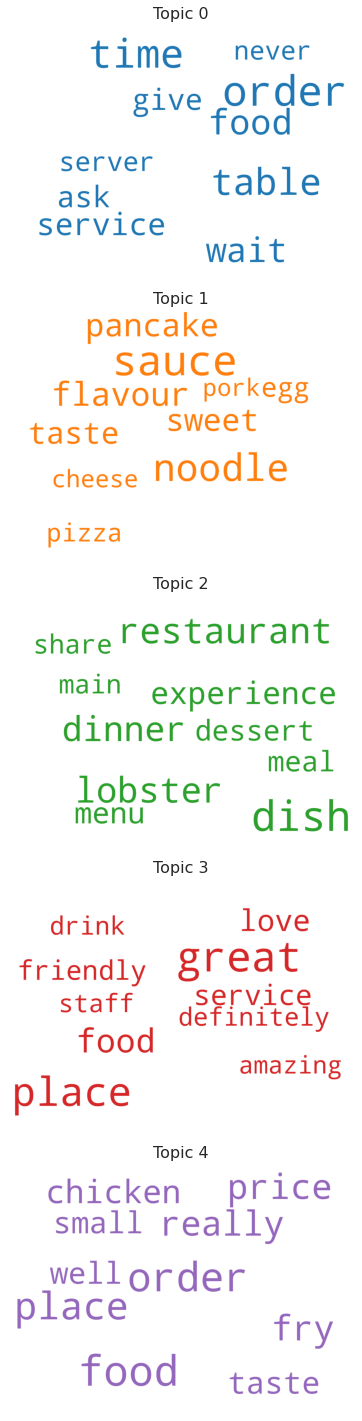

In [ ]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 1, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Based on these plots, we can argue that topics 2, 3 and 4 exhibit unique characteristics as compared to topics 0 and 1. **Topic 2** showcases words commonly belonging to **Western Restaurants**. **Topic 3** showcases words belonging to **Dessert Restaurants**. **Topic 4** showcases words belonging to **Asian Restaurants.**

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=f53c6d21c167f2df2649a4be5e93e34fadde718c18af5f2290c65b5c5c936184
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
# 5 topics

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.041882 -0.124334       1        1  29.420068
0      0.186711 -0.029465       2        1  26.787738
3      0.195514 -0.035655       3        1  21.341318
1     -0.333977 -0.142528       4        1  12.686187
2     -0.090130  0.331981       5        1   9.764689, topic_info=      Term           Freq          Total Category  logprob  loglift
119  great   91746.000000   91746.000000  Default  30.0000  30.0000
43   place  151243.000000  151243.000000  Default  29.0000  29.0000
152   dish   56570.000000   56570.000000  Default  28.0000  28.0000
472  sauce   43708.000000   43708.000000  Default  27.0000  27.0000
38   order  136692.000000  136692.000000  Default  26.0000  26.0000
..     ...            ...            ...      ...      ...      ...
239  night    6664.875716   24829.443786   Topic5  -5.0088   1.0112
568    set    4505.216156    9542.131844   Topic5  -5.4005   1.5759
247  serve    5424.250598   30792.699544   Topic5  -5.2148   0.5900
128    end    5077.351663   21000.872260   Topic5  -5.2809   0.9066
69    well    5475.902940   55542.529473   Topic5  -5.2053   0.0096

[306 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
214       1  0.181142     add
214       2  0.119209     add
214       4  0.699595     add
113       1  0.107739  always
113       3  0.892231  always
...     ...       ...     ...
69        5  0.098591    well
488       5  0.999888    wine
1928      3  0.999887    wing
340       1  0.830835   worth
340       3  0.169155   worth

[444 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 2, 3])

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Keywords', 'Text']
print(df_dominant_topic.shape)
df_dominant_topic.head(10)

(252420, 4)


,Document_No,Dominant_Topic,Keywords,Text
0,0,4.0,"food, order, place, price, fry, really, chicke...","[heart, chinatown, discover, market, day, quit..."
1,1,0.0,"order, time, table, food, wait, service, ask, ...","[super, excited, bring, boyfriend, location, m..."
2,2,3.0,"great, place, food, love, service, friendly, s...","[absolutely, favorite, mushroom, pizza, city, ..."
3,3,3.0,"great, place, food, love, service, friendly, s...","[couple, time, excellent, food, price, love, t..."
4,4,0.0,"order, time, table, food, wait, service, ask, ...","[arrive, minute, closing, time, restaurant, st..."
5,5,0.0,"order, time, table, food, wait, service, ask, ...","[eatery, choose, decide, give, place, usually,..."
6,6,3.0,"great, place, food, love, service, friendly, s...","[amazing, place, co, worker, celebrate, postpa..."
7,7,3.0,"great, place, food, love, service, friendly, s...","[place, small, cozy, love, really, great, food..."
8,8,4.0,"food, order, place, price, fry, really, chicke...","[place, visit, least, month, big, sell, point,..."
9,9,1.0,"sauce, noodle, flavour, pancake, sweet, taste,...","[honestly, little, sweet, liking, expect, trip..."


In [ ]:
# Append new columns onto reviews dataset

df_dominant_topic['Text_Chunks'] = df_dominant_topic['Text']
extra_feature_columns = df_dominant_topic[['Dominant_Topic', 'Keywords', 'Text_Chunks']]
final_reviews = pd.concat([combined_reviews,extra_feature_columns], axis=1).reindex(combined_reviews.index)
final_reviews.head(10)

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,sentiment,Dominant_Topic,Keywords,Text_Chunks
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0.0,0.0,0.0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017.0,6.0,19:04:10,244.0,1442.0,4.709163,93.0,heart chinatown discovered enroute kensington ...,0.213835,0.532102,0.030,0.767,0.204,0.9942,positive,4.0,"food, order, place, price, fry, really, chicke...","[heart, chinatown, discover, market, day, quit..."
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0.0,0.0,0.0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016.0,8.0,16:25:12,233.0,1323.0,4.659483,92.0,super excited bring boyfriend scaddabush locat...,0.188048,0.440286,0.016,0.892,0.091,0.9381,neutral,0.0,"order, time, table, food, wait, service, ask, ...","[super, excited, bring, boyfriend, location, m..."
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0.0,0.0,0.0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016.0,4.0,03:32:19,43.0,240.0,4.829268,13.0,absolutely favorite mushroom pizza city great ...,0.400000,0.690000,0.000,0.781,0.219,0.8930,positive,3.0,"great, place, food, love, service, friendly, s...","[absolutely, favorite, mushroom, pizza, city, ..."
3,PMPMHHLe9vFzcR67iCjgLA,RRhco4irDXPk5EJmvuwr2w,5.0,0.0,0.0,2.0,Been to this a couple of times. Excellent food...,2016-01-17 05:23:59,2016.0,1.0,05:23:59,28.0,148.0,4.321429,11.0,couple time excellent food good price love tea...,0.529167,0.700000,0.000,0.530,0.470,0.9612,positive,3.0,"great, place, food, love, service, friendly, s...","[couple, time, excellent, food, price, love, t..."
4,tWdp26XQEJqJGnRmFVJQxA,IeojscL3rg3x3vtmR-hWlA,4.0,0.0,0.0,0.0,"The pizza is very, very good! We arrived 15 mi...",2018-07-17 01:49:01,2018.0,7.0,01:49:01,20.0,121.0,5.100000,7.0,pizza good arrived 15 minute closing time rest...,0.700000,0.600000,0.000,0.824,0.176,0.6194,positive,0.0,"order, time, table, food, wait, service, ask, ...","[arrive, minute, closing, time, restaurant, st..."
5,tJcpzXzykNSLuzWwa1JQUw,6WmMHMBM4FLGyK98-reecA,1.0,1.0,1.0,1.0,With many eateries to chose from on queen stre...,2016-05-31 01:21:11,2016.0,5.0,01:21:11,341.0,1821.0,4.340176,136.0,many eatery chose queen street decided give pl...,0.079401,0.479401,0.068,0.859,0.073,0.2741,negative,0.0,"order, time, table, food, wait, service, ask, ...","[eatery, choose, decide, give, place, usually,..."
6,28adZ4lsuUeVB2aWzohK9g,BwwqlPVsJk1dbUyNwCWB7Q,5.0,0.0,0.0,0.0,Amazing place! My co-workers and I went here o...,2017-11-06 22:08:35,2017.0,11.0,22:08:35,194.0,1013.0,4.174359,84.0,amazing place coworkers went saturday celebrat...,0.422787,0.521120,0.000,0.759,0.241,0.9958,positive,3.0,"great, place, food, love, service, friendly, s...","[amazing, place, co, worker, celebrate, postpa..."
7,uG0yvj2JWfCf0eaIgxcwXQ,yiLiYYg6MM7Pmuo6jPY4Nw,5.0,0.0,0.0,0.0,"This place is very small and cozy, but what I ...",2015-03-07 13:40:01,2015.0,3.0,13:40:01,67.0,364.0,4.388060,30.0,place small cozy love really get great food pr...,0.292857,0.479592,0.000,0.743,0.257,0.9771,positive,3.0,"great, place, food, love, service, friendly, s...","[place, small, cozy, love, really, great, food..."
8,W7Ua8ELRMm3IPd23fp7XjA,9rMg4ePrSLCqvzebAlUStQ,4.0,0.0,0.0,0.0,This is another great ayce sushi place I visit...,2015-06-21 00:56:43,2015.0,6.0,00:56:43,62.0,340.0,4.500000,23.0,another great ayce sushi place visit least mon...,-0.189583,0.591667,0.097,0.844,0.059,-0.4019,positive,4.0,"food, order, place, price, fry, really, chicke...","[place, visit, least, month, big, sell, point,..."
9,3VHJGvjHeEki7Hiyt-Hv5g,bFh4EO-u9U8uhMyxATvEjQ,4.0,0.0,0.0,0.0,Honestly a little too sweet for my liking but ...,2017-10-11 04:02:35,2017.0,10.0,04:02:35,58.0,308.0,4.327586,22.0,honestly little sweet liking expected getting ...,0.285985,0.518182,0.056,0.593,

In [ ]:
# Save final_reviews into csv file

final_reviews.to_csv("clean_data/final_reviews.csv")

In [ ]:
final_reviews.head()

,business_id,user_id,stars,useful,funny,cool,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,sentiment,Dominant_Topic,Keywords,Text_Chunks
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,0.0,0.0,0.0,"In the heart of Chinatown, I discovered it enr...",2017-06-06 19:04:10,2017.0,6.0,19:04:10,244.0,1442.0,4.709163,93.0,heart chinatown discovered enroute kensington ...,0.213835,0.532102,0.030,0.767,0.204,0.9942,positive,4.0,"food, order, place, price, fry, really, chicke...","[heart, chinatown, discover, market, day, quit..."
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,0.0,0.0,0.0,Was super excited to bring my boyfriend to thi...,2016-08-25 16:25:12,2016.0,8.0,16:25:12,233.0,1323.0,4.659483,92.0,super excited bring boyfriend scaddabush locat...,0.188048,0.440286,0.016,0.892,0.091,0.9381,neutral,0.0,"order, time, table, food, wait, service, ask, ...","[super, excited, bring, boyfriend, location, m..."
2,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,0.0,0.0,0.0,My absolutely favorite mushroom pizza in the c...,2016-04-23 03:32:19,2016.0,4.0,03:32:19,43.0,240.0,4.829268,13.0,absolutely favorite mushroom pizza city great ...,0.400000,0.690000,0.000,0.781,0.219,0.8930,positive,3.0,"great, place, food, love, service, friendly, s...","[absolutely, favorite, mushroom, pizza, city, ..."
3,PMPMHHLe9vFzcR67iCjgLA,RRhco4irDXPk5EJmvuwr2w,5.0,0.0,0.0,2.0,Been to this a couple of times. Excellent food...,2016-01-17 05:23:59,2016.0,1.0,05:23:59,28.0,148.0,4.321429,11.0,couple time excellent food good price love tea...,0.529167,0.700000,0.000,0.530,0.470,0.9612,positive,3.0,"great, place, food, love, service, friendly, s...","[couple, time, excellent, food, price, love, t..."
4,tWdp26XQEJqJGnRmFVJQxA,IeojscL3rg3x3vtmR-hWlA,4.0,0.0,0.0,0.0,"The pizza is very, very good! We arrived 15 mi...",2018-07-17 01:49:01,2018.0,7.0,01:49:01,20.0,121.0,5.100000,7.0,pizza good arrived 15 minute closing time rest...,0.700000,0.600000,0.000,0.824,0.176,0.6194,positive,0.0,"order, time, table, food, wait, service, ask, ...","[arrive, minute, closing, time, restaurant, st..."
